In [1]:
from os import listdir, makedirs
from os.path import join

import numpy as np
import pandas as pd

# from tqdm import tqdm_notebook

import tensorflow as tf

import keras
from keras.engine.input_layer import Input

import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import plot_model, to_categorical

from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv1D, BatchNormalization

from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K

import random, os, sys
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *
import tensorflow as tf
from keras.engine.topology import Layer

pd.set_option('precision', 30)
np.set_printoptions(precision = 30)

np.random.seed(1)


Using TensorFlow backend.


In [4]:
### Generate 200 data point sequences, total 5000 
def gen_data(n=5000, top=40*np.pi, l=200):
    """
    The function generates x and sin(x) sequences
    n: number of sequences
    l: length of each sequence
    top: top x value
    """ 
    x = np.linspace(0, top, n) # evenly spread x points
    y = np.sin(x) + np.random.randn(n) * 0.1  # y = sin(x) plus normal_distributed variations
    
    # get 20 x data points, coresponding y points
    samples = np.random.randint(0, n-200, n//2)  # random pick starting data_point index
    x_data = []
    y_data = []
    for i in samples:
        x_temp = x[i:i+200]  # get 200 data point index
        y_temp = y[i+200]    # only get last value of y in the sequence for training and prediction
        x_data.append(x_temp)
        y_data.append(y_temp)
    x_data=np.array(x_data)
    x_data = np.expand_dims(x_data, -1)
    y_data=np.array(y_data)
    y_data = np.expand_dims(y_data, -1)
    return x_data, y_data        

In [5]:
x_data, y_data = gen_data(50000)  # Used gen_data function to get 50K data points

In [6]:
x_data.shape

(25000, 200, 1)

In [7]:
 y_data.shape

(25000, 1)

In [8]:
x_train, x_val, x_test = x_data[:20000], x_data[20000:22500], x_data[22500:]   
# Getting train, val and test data. No need to shuffle data because sample index was randomly selected 
# in gen_data()

In [9]:
y_train, y_val, y_test = y_data[:20000], y_data[20000:22500], y_data[22500:]

In [10]:
# import functions from Resnet50Conv1d_BN 
from Resnet50Conv1d_BN import identity_block, convolutional_block, ResNet50

In [11]:
# compile the model
keras.backend.clear_session()

model = ResNet50(input_shape = (200, 1), max_pool_s=2, max_strides=2, 
                         strides = 2, f=2, ave_pool_size=2, n_out=1) 
#model = load_model() 

model.compile(
    loss = "mse",
    optimizer = Adam(lr=0.0001),
    metrics=['mae'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 1)       0                                            
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 100, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding1d_1 (ZeroPadding1D (None, 106, 1)       0           max_pooling1d_1[0][0]            
__________________________________________________________________________________________________
conv1 (Conv1D)       

In [12]:
# training the model
batch_size = 1024
epochs = 400

checkpointer = ModelCheckpoint(
    './Resnet50Conv1d_sin', 
    verbose=2, 
    save_best_only=True)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                    callbacks=[checkpointer], validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 2500 samples
Epoch 1/400
20000/20000 [==============================] - 15s 761us/step - loss: 29.3653 - mean_absolute_error: 3.6507 - val_loss: 3.3728 - val_mean_absolute_error: 1.2864

Epoch 00001: val_loss improved from inf to 3.37279, saving model to ./Resnet50Conv1d_sin
Epoch 2/400
20000/20000 [==============================] - 2s 113us/step - loss: 10.4593 - mean_absolute_error: 2.3814 - val_loss: 2.6169 - val_mean_absolute_error: 1.0641

Epoch 00002: val_loss improved from 3.37279 to 2.61692, saving model to ./Resnet50Conv1d_sin
Epoch 3/400
20000/20000 [==============================] - 2s 106us/step - loss: 7.4390 - mean_absolute_error: 2.0234 - val_loss: 1.3996 - val_mean_absolute_error: 0.7366

Epoch 00003: val_loss improved from 2.61692 to 1.39960, saving model to ./Resnet50Conv1d_sin
Epoch 4/400
20000/20000 [==============================] - 2s 107us/step - loss: 6.0404 - mean_absolute_error

Epoch 33/400
20000/20000 [==============================] - 2s 105us/step - loss: 0.8787 - mean_absolute_error: 0.5721 - val_loss: 0.4702 - val_mean_absolute_error: 0.2793

Epoch 00033: val_loss did not improve from 0.45253
Epoch 34/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.8381 - mean_absolute_error: 0.5472 - val_loss: 0.4950 - val_mean_absolute_error: 0.2966

Epoch 00034: val_loss did not improve from 0.45253
Epoch 35/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.8281 - mean_absolute_error: 0.5470 - val_loss: 0.4925 - val_mean_absolute_error: 0.3070

Epoch 00035: val_loss did not improve from 0.45253
Epoch 36/400
20000/20000 [==============================] - 2s 110us/step - loss: 0.8215 - mean_absolute_error: 0.5465 - val_loss: 0.4322 - val_mean_absolute_error: 0.2442

Epoch 00036: val_loss improved from 0.45253 to 0.43218, saving model to ./Resnet50Conv1d_sin
Epoch 37/400
20000/20000 [==============================] - 2s

20000/20000 [==============================] - 2s 107us/step - loss: 0.6399 - mean_absolute_error: 0.4528 - val_loss: 0.4886 - val_mean_absolute_error: 0.3239

Epoch 00068: val_loss did not improve from 0.40090
Epoch 69/400
20000/20000 [==============================] - 2s 108us/step - loss: 0.5945 - mean_absolute_error: 0.4181 - val_loss: 0.4090 - val_mean_absolute_error: 0.2496

Epoch 00069: val_loss did not improve from 0.40090
Epoch 70/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.6227 - mean_absolute_error: 0.4393 - val_loss: 0.4246 - val_mean_absolute_error: 0.2660

Epoch 00070: val_loss did not improve from 0.40090
Epoch 71/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.5692 - mean_absolute_error: 0.4018 - val_loss: 0.4135 - val_mean_absolute_error: 0.2447

Epoch 00071: val_loss did not improve from 0.40090
Epoch 72/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.5706 - mean_absolute_error: 0.397

20000/20000 [==============================] - 2s 105us/step - loss: 0.5729 - mean_absolute_error: 0.4271 - val_loss: 0.4650 - val_mean_absolute_error: 0.3387

Epoch 00104: val_loss did not improve from 0.37111
Epoch 105/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.4950 - mean_absolute_error: 0.3702 - val_loss: 0.3958 - val_mean_absolute_error: 0.2678

Epoch 00105: val_loss did not improve from 0.37111
Epoch 106/400
20000/20000 [==============================] - 2s 103us/step - loss: 0.4908 - mean_absolute_error: 0.3558 - val_loss: 0.3674 - val_mean_absolute_error: 0.2400

Epoch 00106: val_loss improved from 0.37111 to 0.36736, saving model to ./Resnet50Conv1d_sin
Epoch 107/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.4680 - mean_absolute_error: 0.3484 - val_loss: 0.3520 - val_mean_absolute_error: 0.2197

Epoch 00107: val_loss improved from 0.36736 to 0.35198, saving model to ./Resnet50Conv1d_sin
Epoch 108/400
20000/20000 [===


Epoch 00139: val_loss did not improve from 0.29592
Epoch 140/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.4410 - mean_absolute_error: 0.3465 - val_loss: 0.3461 - val_mean_absolute_error: 0.2544

Epoch 00140: val_loss did not improve from 0.29592
Epoch 141/400
20000/20000 [==============================] - 2s 105us/step - loss: 0.3720 - mean_absolute_error: 0.2845 - val_loss: 0.4373 - val_mean_absolute_error: 0.3387

Epoch 00141: val_loss did not improve from 0.29592
Epoch 142/400
20000/20000 [==============================] - 2s 105us/step - loss: 0.4099 - mean_absolute_error: 0.3255 - val_loss: 0.3346 - val_mean_absolute_error: 0.2483

Epoch 00142: val_loss did not improve from 0.29592
Epoch 143/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.4369 - mean_absolute_error: 0.3516 - val_loss: 0.3369 - val_mean_absolute_error: 0.2446

Epoch 00143: val_loss did not improve from 0.29592
Epoch 144/400
20000/20000 [=====================


Epoch 00175: val_loss did not improve from 0.27855
Epoch 176/400
20000/20000 [==============================] - 2s 113us/step - loss: 0.3658 - mean_absolute_error: 0.3218 - val_loss: 0.2868 - val_mean_absolute_error: 0.2438

Epoch 00176: val_loss did not improve from 0.27855
Epoch 177/400
20000/20000 [==============================] - 2s 114us/step - loss: 0.4670 - mean_absolute_error: 0.4089 - val_loss: 0.4338 - val_mean_absolute_error: 0.3632

Epoch 00177: val_loss did not improve from 0.27855
Epoch 178/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.4103 - mean_absolute_error: 0.3712 - val_loss: 0.3255 - val_mean_absolute_error: 0.2811

Epoch 00178: val_loss did not improve from 0.27855
Epoch 179/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.4164 - mean_absolute_error: 0.3746 - val_loss: 0.3052 - val_mean_absolute_error: 0.2650

Epoch 00179: val_loss did not improve from 0.27855
Epoch 180/400
20000/20000 [=====================


Epoch 00211: val_loss improved from 0.22837 to 0.20750, saving model to ./Resnet50Conv1d_sin
Epoch 212/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.3140 - mean_absolute_error: 0.2991 - val_loss: 0.3797 - val_mean_absolute_error: 0.3523

Epoch 00212: val_loss did not improve from 0.20750
Epoch 213/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.3158 - mean_absolute_error: 0.3113 - val_loss: 0.3087 - val_mean_absolute_error: 0.2998

Epoch 00213: val_loss did not improve from 0.20750
Epoch 214/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.3305 - mean_absolute_error: 0.3279 - val_loss: 0.2651 - val_mean_absolute_error: 0.2590

Epoch 00214: val_loss did not improve from 0.20750
Epoch 215/400
20000/20000 [==============================] - 2s 112us/step - loss: 0.3251 - mean_absolute_error: 0.3149 - val_loss: 0.3931 - val_mean_absolute_error: 0.3542

Epoch 00215: val_loss did not improve from 0.20750
Epoch 

Epoch 248/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.2331 - mean_absolute_error: 0.2687 - val_loss: 0.1957 - val_mean_absolute_error: 0.2207

Epoch 00248: val_loss did not improve from 0.18000
Epoch 249/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.2311 - mean_absolute_error: 0.2587 - val_loss: 0.1989 - val_mean_absolute_error: 0.2187

Epoch 00249: val_loss did not improve from 0.18000
Epoch 250/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.2052 - mean_absolute_error: 0.2380 - val_loss: 0.2134 - val_mean_absolute_error: 0.2414

Epoch 00250: val_loss did not improve from 0.18000
Epoch 251/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.2427 - mean_absolute_error: 0.2770 - val_loss: 0.1674 - val_mean_absolute_error: 0.1868

Epoch 00251: val_loss improved from 0.18000 to 0.16743, saving model to ./Resnet50Conv1d_sin
Epoch 252/400
20000/20000 [==============================]

20000/20000 [==============================] - 2s 109us/step - loss: 0.2233 - mean_absolute_error: 0.2935 - val_loss: 0.2086 - val_mean_absolute_error: 0.2824

Epoch 00284: val_loss did not improve from 0.14122
Epoch 285/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.2192 - mean_absolute_error: 0.2910 - val_loss: 0.2671 - val_mean_absolute_error: 0.3058

Epoch 00285: val_loss did not improve from 0.14122
Epoch 286/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1916 - mean_absolute_error: 0.2595 - val_loss: 0.1787 - val_mean_absolute_error: 0.2395

Epoch 00286: val_loss did not improve from 0.14122
Epoch 287/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.1669 - mean_absolute_error: 0.2321 - val_loss: 0.1331 - val_mean_absolute_error: 0.1793

Epoch 00287: val_loss improved from 0.14122 to 0.13308, saving model to ./Resnet50Conv1d_sin
Epoch 288/400
20000/20000 [==============================] - 2s 106us/st

20000/20000 [==============================] - 2s 108us/step - loss: 0.1449 - mean_absolute_error: 0.2329 - val_loss: 0.1375 - val_mean_absolute_error: 0.2173

Epoch 00319: val_loss did not improve from 0.10560
Epoch 320/400
20000/20000 [==============================] - 2s 104us/step - loss: 0.1587 - mean_absolute_error: 0.2423 - val_loss: 0.1503 - val_mean_absolute_error: 0.2415

Epoch 00320: val_loss did not improve from 0.10560
Epoch 321/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.2139 - mean_absolute_error: 0.3120 - val_loss: 0.2666 - val_mean_absolute_error: 0.3517

Epoch 00321: val_loss did not improve from 0.10560
Epoch 322/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.1934 - mean_absolute_error: 0.2957 - val_loss: 0.1086 - val_mean_absolute_error: 0.1924

Epoch 00322: val_loss did not improve from 0.10560
Epoch 323/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.1366 - mean_absolute_error: 0

20000/20000 [==============================] - 2s 106us/step - loss: 0.0874 - mean_absolute_error: 0.1823 - val_loss: 0.0750 - val_mean_absolute_error: 0.1468

Epoch 00355: val_loss did not improve from 0.06759
Epoch 356/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.0835 - mean_absolute_error: 0.1746 - val_loss: 0.0811 - val_mean_absolute_error: 0.1649

Epoch 00356: val_loss did not improve from 0.06759
Epoch 357/400
20000/20000 [==============================] - 2s 105us/step - loss: 0.1044 - mean_absolute_error: 0.2064 - val_loss: 0.0906 - val_mean_absolute_error: 0.1771

Epoch 00357: val_loss did not improve from 0.06759
Epoch 358/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.0974 - mean_absolute_error: 0.1964 - val_loss: 0.1159 - val_mean_absolute_error: 0.2060

Epoch 00358: val_loss did not improve from 0.06759
Epoch 359/400
20000/20000 [==============================] - 2s 106us/step - loss: 0.1105 - mean_absolute_error: 0

20000/20000 [==============================] - 2s 110us/step - loss: 0.0709 - mean_absolute_error: 0.1662 - val_loss: 0.1110 - val_mean_absolute_error: 0.2029

Epoch 00391: val_loss did not improve from 0.05128
Epoch 392/400
20000/20000 [==============================] - 2s 109us/step - loss: 0.0986 - mean_absolute_error: 0.2175 - val_loss: 0.1100 - val_mean_absolute_error: 0.2224

Epoch 00392: val_loss did not improve from 0.05128
Epoch 393/400
20000/20000 [==============================] - 2s 111us/step - loss: 0.2098 - mean_absolute_error: 0.3392 - val_loss: 0.1973 - val_mean_absolute_error: 0.3034

Epoch 00393: val_loss did not improve from 0.05128
Epoch 394/400
20000/20000 [==============================] - 2s 111us/step - loss: 0.1171 - mean_absolute_error: 0.2431 - val_loss: 0.2405 - val_mean_absolute_error: 0.3335

Epoch 00394: val_loss did not improve from 0.05128
Epoch 395/400
20000/20000 [==============================] - 2s 107us/step - loss: 0.0957 - mean_absolute_error: 0

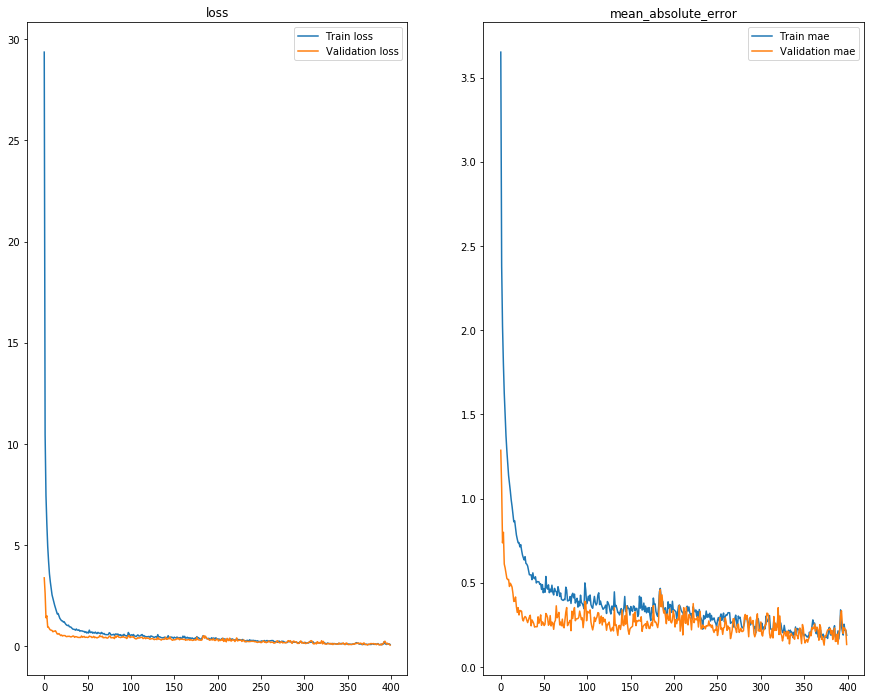

In [13]:
# plotting the loss, and mean absolute error
fig, ax = plt.subplots(1, 2, figsize=(15,12))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('mean_absolute_error')
ax[1].plot(history.epoch, history.history["mean_absolute_error"], label="Train mae")
ax[1].plot(history.epoch, history.history["val_mean_absolute_error"], label="Validation mae")
ax[0].legend()
ax[1].legend()

In [14]:
# Getting prediction for the test data
y_test_pred = model.predict(x_test)

In [15]:
y_test.shape

(2500, 1)

In [16]:
y_test_pred.shape

(2500, 1)

In [17]:
# We predicted the last Y value of 200 long sequence, getting the last value of x for the plotting
x_test_100 = x_test[:,199,:]

In [18]:
x = np.linspace(0, 40*np.pi, 2000)

In [23]:
y = np.sin(x) 

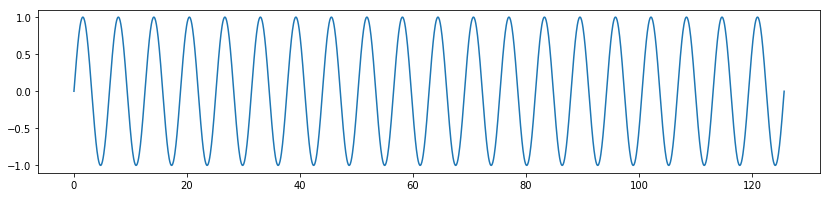

In [24]:
# Plotting y=sin(x) plot
plt.subplots(figsize=(14, 3))
plt.plot(x, y)

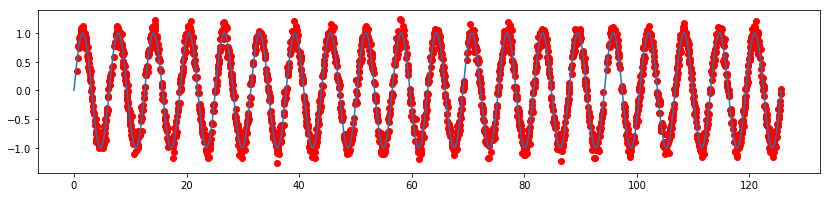

In [25]:
# plot x_test, y_test onto sin(x)
plt.subplots(figsize=(14, 3))
plt.plot(x, y)
plt.scatter(x_test_100, y_test, color='r')

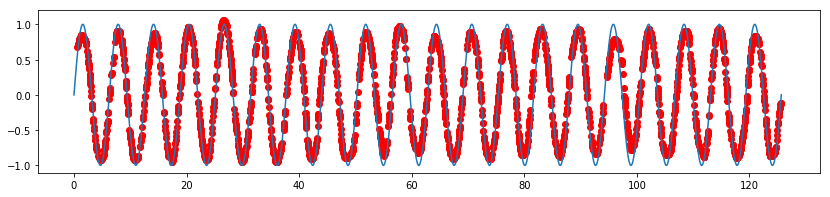

In [26]:
# Visualize the prediction for test data.
# plot x_test, y_test_pred onto sin(x). Predictions were quite accurate. 
plt.subplots(figsize=(14, 3))
plt.plot(x, y)
plt.scatter(x_test_100, y_test_pred, color='r')